In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('ansel/transfer_data.csv', sep=",")

Данный набор данных представляет собой перечень всех переходов футболистов в период с сезона 2007\2008 по сезон 2016\2017.Используются такие данные,как Имя,Фамилия,Позиция,Гражданство,Клуб откуда,Клуб куда и прочие.На основе этих данных постараемся определить зависимости,такие как Самая богатая лига или самый активный сезон по трансферам. Так же постараемся понять,когда переходят более дорогие игроки,в середине сезона или между сезонами.

In [3]:
print(data.head())

            PLAYER      WINDOW    POSITION    COUNTRY               FROM  \
0       Paul Pogba  Pre-Season  Midfielder     France           Juventus   
1      Gareth Bale  Pre-Season  Midfielder      Wales          Tottenham   
2      Luis Suarez  Pre-Season    Attacker    Uruguay          Liverpool   
3          Ronaldo  Pre-Season         NaN        NaN  Manchester United   
4  Gonzalo Higuain  Pre-Season    Attacker  Argentina             Napoli   

                  TO DESCRIPTION        PRICE   LEAGUE SEASON  
0  Manchester United        Sold  105000000.0      EPL  16/17  
1        Real Madrid        Sold  100000000.0  La Liga  13/14  
2          Barcelona        Sold   95000000.0  La Liga  14/15  
3        Real Madrid        Sold   93900000.0  La Liga  09/10  
4           Juventus        Sold   90000000.0  Serie A  16/17  


In [4]:
data.shape

(6237, 10)

In [5]:
data.columns

Index(['PLAYER', 'WINDOW', 'POSITION', 'COUNTRY', 'FROM', 'TO', 'DESCRIPTION',
       'PRICE', 'LEAGUE', 'SEASON'],
      dtype='object')

In [6]:
del data["POSITION"]
del data["COUNTRY"]

In [7]:
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))
data = data.drop(data[data["SEASON"] == 'nan'].index)
data=data.sort_values('SEASON')


PLAYER - 1
WINDOW - 1
FROM - 2
TO - 1
DESCRIPTION - 1
PRICE - 1
LEAGUE - 1
SEASON - 1


In [8]:
data.dropna()

,PLAYER,WINDOW,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
1122,Pongolle,Pre-Season,Liverpool,Recreativo,Sold,4000000.0,La Liga,07/08
4727,L. Vigiani,Pre-Season,Livorno,Reggina,Free,0.0,Serie A,07/08
4726,C. Puggioni,Pre-Season,Pisa Calcio,Reggina,Free,0.0,Serie A,07/08
4725,Bianco,Pre-Season,Catania,Reggina,Free,0.0,Serie A,07/08
4724,N. Novakovic,Pre-Season,Odense,Reggina,Free,0.0,Serie A,07/08
...,...,...,...,...,...,...,...,...
2838,Ashley Fletcher,Pre-Season,Manchester United,West Ham,Free,0.0,EPL,16/17
2837,Hal Robson-Kanu,Pre-Season,Reading,West Brom,Free,0.0,EPL,16/17
2836,Adrian Mariappa,Pre-Season,Crystal Palace,Watford,Free,0.0,EPL,16/17
3084,Oliver Torres,Pre-Season,Atletico Madrid,Porto,Loan,0.0,ROE,16/17


In [9]:
data.describe()

,PRICE
count,6.236000e+03
mean,2.758248e+06
std,7.312051e+06
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,2.000000e+06
max,1.050000e+08


In [10]:
dataseas=data.groupby("LEAGUE")

In [11]:
seasons=data["SEASON"].unique()[:len(data["SEASON"].unique())-1]
# for elem,ind in (seasons):
#     elem.replace("/","!")
#     print(type(elem))
seasonL=sorted(seasons, key=lambda x:(x==0, x))
print("res:",seasonL)

res: ['07/08', '08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15', '15', '15/16', '16', '16/17']


In [12]:
i=0
sum=[]
names=[]
while(i<len(data["LEAGUE"].unique())-1):
    sum.append(dataseas.get_group(data["LEAGUE"].unique()[i])["PRICE"].max())
    names.append(data["LEAGUE"].unique()[i])
#     print(data["LEAGUE"].unique()[i])
    i+=1
print(sum)
print(names)

[100000000.0, 90000000.0, 64500000.0, 105000000.0, 40000000.0, 7000000.0]
['La Liga', 'Serie A', 'ROE', 'EPL', 'Bundesliga', 'MLS']


In [13]:
len(data["LEAGUE"].unique())

7

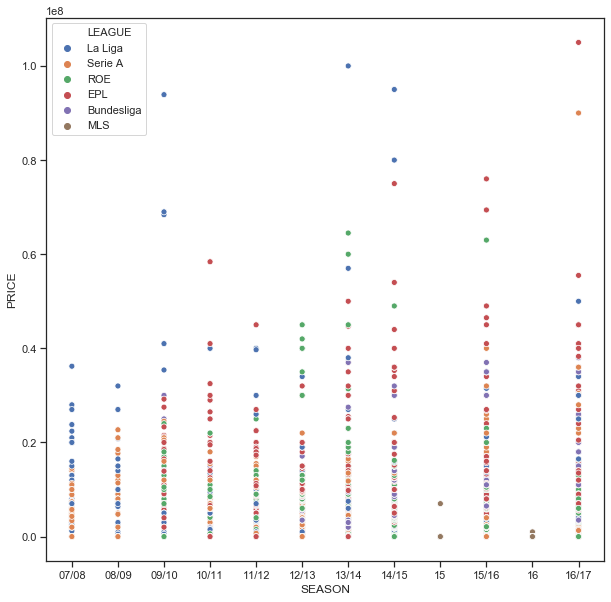

In [14]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x="SEASON", y="PRICE" ,data=data, hue="LEAGUE")
# plt.scatter(x="SEASON", y="PRICE" ,data=data, hue="LEAGUE")


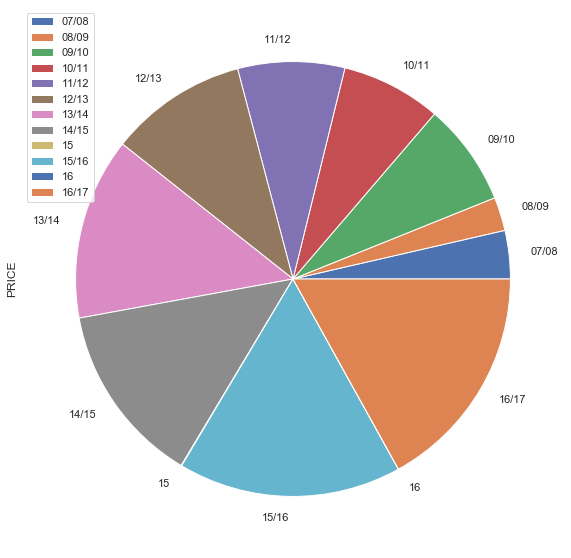

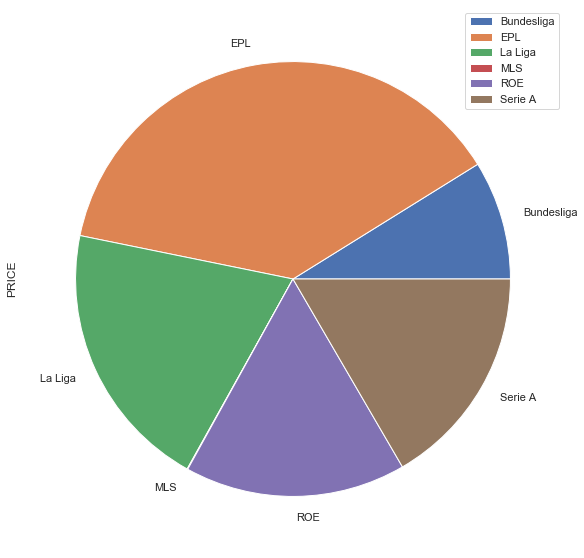

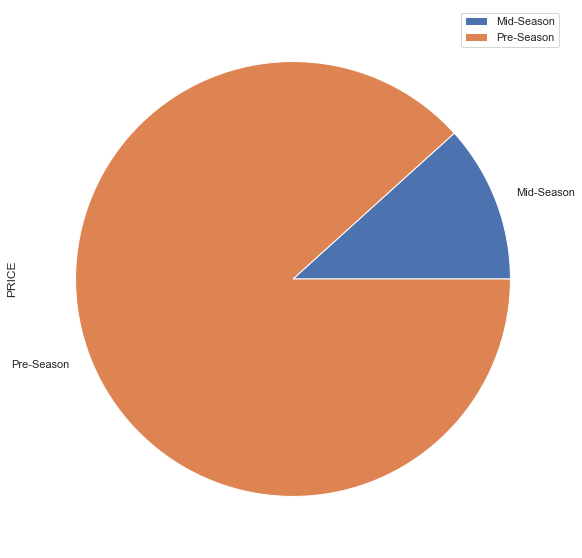

In [37]:
data.groupby("SEASON").sum().plot.pie(y='PRICE',figsize = (10,10))
data.groupby("LEAGUE").sum().plot.pie(y='PRICE',figsize = (10,10))
data.groupby("WINDOW").sum().plot.pie(y='PRICE',figsize = (10,10))

In [26]:
data["PRICE"].unique()

array([4.000e+06, 0.000e+00, 1.400e+07, 1.500e+06, 1.450e+07, 1.300e+07,
       1.200e+07, 1.700e+06, 3.000e+06, 3.200e+06, 1.200e+06, 6.000e+06,
       1.500e+07, 6.300e+06, 1.600e+07, 7.000e+06, 8.000e+06, 2.500e+06,
       7.500e+06, 9.000e+06, 2.000e+06, 8.900e+06, 1.130e+07, 7.400e+06,
       1.100e+07, 1.000e+07, 5.300e+06, 4.600e+06, 2.240e+07, 4.500e+06,
       3.620e+07, 3.700e+06, 2.800e+07, 2.100e+07, 2.000e+07, 5.000e+06,
       4.700e+06, 2.380e+07, 5.500e+06, 2.700e+07, 3.400e+06, 4.300e+06,
       5.750e+06, 3.200e+07, 1.140e+07, 4.750e+06, 2.400e+06, 9.500e+05,
       5.000e+05, 1.770e+07, 2.080e+07, 1.850e+07, 1.650e+07, 6.500e+06,
       6.400e+06, 2.270e+07, 2.900e+06, 2.850e+06, 2.800e+06, 2.300e+06,
       5.700e+06, 2.200e+06, 5.800e+06, 3.300e+06, 5.850e+06, 3.500e+06,
       4.100e+06, 3.100e+06, 6.800e+06, 4.000e+05, 1.700e+07, 3.000e+07,
       1.800e+06, 2.150e+07, 2.120e+07, 2.050e+07, 2.500e+07, 2.450e+07,
       2.400e+07, 2.330e+07, 3.000e+05, 1.870e+07, 

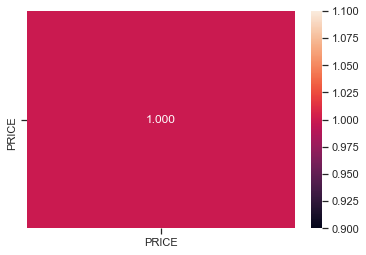

In [30]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')